In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [2]:
#Read and load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/avocado.csv')
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [3]:
#check for missing values
data.isnull().sum()

Unnamed: 0      14951
Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

In [4]:
#Filling missing values with mean, median and mode
data['Total Volume'].fillna(data['Total Volume'].mean(), inplace=True)
data['4046'].fillna(data['4046'].median(), inplace=True)
data['4225'].fillna(data['4225'].mean(), inplace=True)
data['4770'].fillna(data['4770'].median(), inplace=True)
data['region'].fillna(data['region'].mode()[0], inplace=True)
data['AveragePrice'].interpolate(method='linear', inplace=True)

data['type'].fillna(data['type'].mode()[0], inplace=True)
data['Total Bags'].fillna(data['Total Bags'].median(), inplace=True)
data['Small Bags'].fillna(data['Small Bags'].median(), inplace=True)
data['Large Bags'].fillna(data['Large Bags'].median(), inplace=True)
data['XLarge Bags'].fillna(data['XLarge Bags'].median(), inplace=True)

In [5]:
#Drop unecessary columns
data = data.drop(columns=['Unnamed: 0', 'Date', 'year'])

In [6]:
#Encode type and region for classification
label_encoder = LabelEncoder()
data['type'] = label_encoder.fit_transform(data['type'])
data['region'] = label_encoder.fit_transform(data['region'])

In [7]:
X = data.drop(columns=['AveragePrice', 'type'])
y_classification = data['type']
y_regression = data['AveragePrice']

#Train-test for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_classification, test_size=0.2, random_state=42)

#Train-test for regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_reg = scaler.fit_transform(X_train_reg)
X_test_reg = scaler.transform(X_test_reg)

In [8]:
#Training a Random Forest Classifier model for classification
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_class, y_train_class)
y_pred_class = clf.predict(X_test_class)

#Evaluating the model
print("Classification Accuracy:", accuracy_score(y_test_class, y_pred_class))
print("Classification Report:", classification_report(y_test_class, y_pred_class))

Classification Accuracy: 1.0
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3294

    accuracy                           1.00      3294
   macro avg       1.00      1.00      1.00      3294
weighted avg       1.00      1.00      1.00      3294



In [9]:
#Training a Random Forest Classifier for regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_reg, y_train_reg)
y_pred_reg = rf_reg.predict(X_test_reg)

print ("Regression Mean Squared Error:", mean_squared_error(y_test_reg, y_pred_reg))
print ("Regression R^2:", r2_score(y_test_reg, y_pred_reg))

Regression Mean Squared Error: 0.0006130047540983617
Regression R^2: 0.9548666137774241


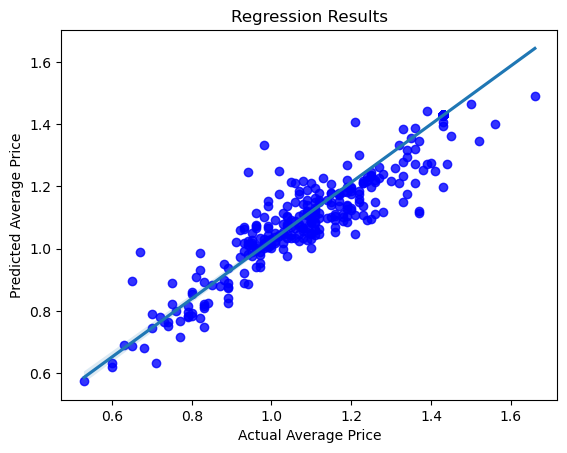

In [10]:
sns.regplot(x=y_test_reg, y=y_pred_reg, scatter_kws={"color":"blue"})
plt.xlabel('Actual Average Price')
plt.ylabel('Predicted Average Price')
plt.title('Regression Results')
plt.show()

In [11]:
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, classification_report
#defining Kfold Cross Validation
kf = KFold(n_splits=5, random_state=42, shuffle=True)

In [12]:
#random forest hyper parameter tuning for classification

param_grid_rf = {
    'n_estimators':[50,100,200],
    'max_depth': [10,20,30,None],
    'min_samples_split': [2,5,10]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=kf,scoring='accuracy')
grid_rf.fit(X_train_class, y_train_class)

#best parameters and evaluation

print("Best Parameters:", grid_rf.best_params_)

y_pred_class = grid_rf.best_estimator_.predict(X_test_class)
print("Best Accuracy:", accuracy_score(y_test_class, y_pred_class))

Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
Best Accuracy: 1.0


In [13]:
# Hyperparameter grid for RandomForestClassifier
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10]
}

# Perform grid search cross-validation
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train_class, y_train_class)

# Predict and evaluate the best estimator from GridSearch
y_pred_class = grid_rf.best_estimator_.predict(X_test_class)

# Use the evaluation metric to select the best model
accuracy = accuracy_score(y_test_class, y_pred_class)
f1 = f1_score(y_test_class, y_pred_class)

print(f"Best Accuracy from Random Forest: {accuracy}")
print(f"Best F1-Score from Random Forest: {f1}")

# Check for threshold to select the model
if accuracy > 0.90: 
    best_class_model = grid_rf.best_estimator_
    print(f"Selected Random Forest model with Accuracy: {accuracy}")
else:
    print("Model did not meet the accuracy threshold.")


Best Accuracy from Random Forest: 1.0
Best F1-Score from Random Forest: 0.0
Selected Random Forest model with Accuracy: 1.0


C:\Users\sheba\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


In [14]:
#Hyperparameter tuning for linear regression
from sklearn.linear_model import Ridge, Lasso

#Define the models
ridge = Ridge()
lasso = Lasso()

#ridge and lasso regularization
param_grid_ridge = {'alpha':[0.01,0.1,1.0,10,100]}
param_grid_lasso = {'alpha':[0.01,0.1,1.0,10,100]}

#define parameter grid for ridge and lasso
grid_ridge = GridSearchCV(ridge, param_grid_ridge, cv=kf, scoring='neg_mean_squared_error')
grid_lasso = GridSearchCV(lasso, param_grid_ridge, cv=kf, scoring='neg_mean_squared_error')

grid_ridge.fit(X_train_reg, y_train_reg)
grid_lasso.fit(X_train_reg,y_train_reg)

#predict and evaluate the best model
y_pred_ridge = grid_ridge.best_estimator_.predict(X_test_reg)
y_pred_lasso = grid_lasso.best_estimator_.predict(X_test_reg)

#Mean Squared Error
print("Ridge Best MSE:", mean_squared_error(y_test_reg, y_pred_ridge))
print("Lasso Best MSE:", mean_squared_error(y_test_reg, y_pred_lasso))


Ridge Best MSE: 0.002801725747955569
Lasso Best MSE: 0.00802135312348203


In [15]:
#Selecting the best model
ridge_mse = mean_squared_error(y_test_reg, y_pred_ridge)
lasso_mse = mean_squared_error(y_test_reg, y_pred_lasso)

if ridge_mse < lasso_mse:
      best_reg_model = grid_ridge.best_estimator_
      print("Ridge Regression selected with MSE:", ridge_mse)
else:
      best_reg_model = grid_lasso.best_estimator_
      print("Lasso Regression selected with MSE:", lasso_mse)                          


Ridge Regression selected with MSE: 0.002801725747955569


In [16]:
import joblib

#save classification model
joblib.dump(best_class_model, 'best_class_model.pkl')

#save regression model
joblib.dump(best_class_model, 'best_reg_model.pkl')

print ("Best models saved for production")

Best models saved for production
